Es necesario instalar para poder importar desde Kaggle el dataset necesario



In [10]:

!pip install -U kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.8)


Kaggle nos brinda un json como clave para poder acceder a sus recursos

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juanjosehurtado","key":"0259ec1f735a14f80809758e8a265710"}'}

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Descargamos el dataset que necesitamos y lo descomprimimos

In [14]:
!kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.91G/7.92G [03:14<00:00, 65.1MB/s]
100% 7.92G/7.92G [03:14<00:00, 43.8MB/s]


In [15]:
!unzip -q fruit-recognition.zip -d .

Importamos todas las librerías que creemos necesarias

In [16]:
import sys
import os 
import cv2
import random
import time
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import keras

import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model,to_categorical


import keras.backend as K
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pandas as pd
from  pathlib import Path
import random
from os import listdir
import re
from  pathlib import Path
import xml.etree.ElementTree as ET
from PIL import Image
import os
import uuid
import json
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
listdir()

Nos ubicamos en la carpeta en donde se encuentran las imágenes


In [17]:
!cd /content

#bool(re.search("[.|_]", "abcdefghijkl"))

convertimos las carpetas necesarias en un dataframe, el cual particionamos en train y test generando un random cada iteración(90% de probabilidad de ser train, 10% test), manipulando un poco las rutas y con la suerte de que todos los archivos están en formato png

In [72]:
dir=[]
fruit_dir= Path('.')
carpetas=['/content/Apple/Total Number of Apples','/content/Banana', '/content/Carambola', '/content/Guava/guava total final', 
          '/content/Kiwi/Total Number of Kiwi fruit', '/content/Mango', '/content/Pear', '/content/Orange']

          


for i in range(len(carpetas)):
  dir.append(fruit_dir / carpetas[i])
  print(i, end=" ")
print("")
datos=[]

for j in range(len(carpetas)):
  datos.append(dir[j].glob('*.png'))
  print(j, end=" ")
print("")
print(len(datos))
data=[]
splits=[]
f=0
cont=0
for k in datos:  
  for l in k:
    
    split=random.random()
    if split <0.9:
      spl='train'
      data.append((l,f))
      splits.append(spl)
      if cont<5:
        print(f, end= " ")
        cont+= 1
    else:
      spl='test'
      data.append((l,f))
      splits.append(spl)
  f+=1
print("")
df=pd.DataFrame()
df['names'],df['label']=zip(*data)

df['split']=splits
df = df.sample(frac=1).reset_index(drop=True)
print(len(df))
print(df['label'].unique())
df.head(20)



0 1 2 3 4 5 6 7 
0 1 2 3 4 5 6 7 
8
0 0 0 0 0 
27932
[1 3 4 2 5 7 6 0]


names  label  split
0                     /content/Banana/Banana02110.png      1  train
1                     /content/Banana/Banana01428.png      1  train
2     /content/Guava/guava total final/Guava01428.png      3  train
3   /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
4             /content/Carambola/Carambola 001259.png      2  train
5                      /content/Mango/Mango002745.png      5  train
6                       /content/Mango/Mango00749.png      5  train
7                     /content/Banana/Banana02956.png      1  train
8                    /content/Orange/Orange002818.png      7  train
9                      /content/Mango/Mango003145.png      5  train
10                        /content/Pear/Pear 1094.png      6  train
11  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
12     /content/Guava/guava total final/Guava0337.png      3  train
13  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
14  /content/Apple/Total Number of Apples/Apple 03...      0  train
15                      /content/Mango/Mango00503.png      5  train
16                     /content/Mango/Mango003766.png      5   test
17  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
18                        /content/Pear/Pear 1314.png      6  train
19                   /content/Orange/Orange001092.png      7  train

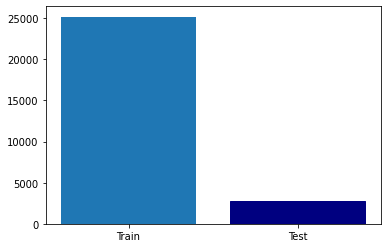

In [19]:
bar=plt.bar(['Train','Test'],df['split'].value_counts()[0:2])
bar[1].set_color('navy')

'RGB'

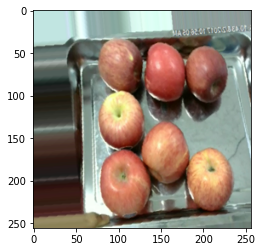

In [20]:
img=image.load_img(df['names'][16])
new_img = img. resize((256,256))
imshow(new_img)
df['names'][16]

img.mode

In [21]:
df_meta=df.copy()
df_meta.to_csv('meta_data.csv', index=False)
df=pd.read_csv('meta_data.csv')
#df=df.drop(['Unnamed: 0'],axis=1)
df.head(50)

names  label  split
0                      /content/Mango/Mango002817.png      5  train
1                         /content/Pear/Pear 2116.png      6  train
2                         /content/Pear/Pear 1818.png      6  train
3                    /content/Orange/Orange001955.png      7  train
4                       /content/Mango/Mango00996.png      5  train
5                     /content/Banana/Banana01638.png      1  train
6   /content/Apple/Total Number of Apples/Apple 02...      0  train
7      /content/Guava/guava total final/Guava0243.png      3  train
8   /content/Apple/Total Number of Apples/Apple 03...      0  train
9                       /content/Mango/Mango00328.png      5  train
10                       /content/Mango/Mango0081.png      5  train
11  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
12             /content/Carambola/Carambola 00916.png      2  train
13                     /content/Banana/Banana0637.png      1  train
14                     /content/Mango/Mango003641.png      5  train
15                   /content/Orange/Orange002845.png      7  train
16  /content/Apple/Total Number of Apples/Apple 01...      0  train
17                    /content/Banana/Banana02575.png      1   test
18    /content/Guava/guava total final/Guava01918.png      3  train
19                     /content/Mango/Mango001674.png      5  train
20  /content/Apple/Total Number of Apples/Apple 01...      0  train
21                     /content/Mango/Mango002793.png      5  train
22                     /content/Banana/Banana0915.png      1  train
23                         /content/Pear/Pear 971.png      6  train
24                    /content/Orange/Orange00876.png      7  train
25                     /content/Mango/Mango001791.png      5  train
26  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
27                        /content/Pear/Pear 1139.png      6  train
28                        /content/Pear/Pear 1851.png      6  train
29                         /content/Pear/Pear 442.png      6  train
30     /content/Guava/guava total final/Guava0598.png      3  train
31     /content/Guava/guava total final/Guava0233.png      3  train
32            /content/Carambola/Carambola 001665.png      2  train
33                      /content/Pear/pear_0_3194.png      6  train
34  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
35                     /content/Mango/Mango003018.png      5   test
36                   /content/Orange/Orange002657.png      7  train
37                    /content/Banana/Banana01192.png      1  train
38  /content/Apple/Total Number of Apples/Apple 03...      0  train
39                     /content/Mango/Mango004086.png      5  train
40    /content/Guava/guava total final/Guava01355.png      3  train
41            /content/Carambola/Carambola 001611.png      2  train
42  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
43    /content/Guava/guava total final/Guava01048.png      3  train
44                          /content/Pear/Pear 89.png      6  train
45  /content/Apple/Total Number of Apples/Apple 04...      0   test
46  /content/Kiwi/Total Number of Kiwi fruit/Kiwi0...      4  train
47                   /content/Orange/Orange001525.png      7   test
48    /content/Guava/guava total final/Guava01391.png      3   test
49                   /content/Orange/Orange001354.png      7  train

**mostramos la cantidad de datos que tenemos por cada dato**






In [22]:
df.groupby('label').count()

names  split
label              
0       4466   4466
1       3027   3027
2       2080   2080
3       4008   4008
4       4173   4173
5       4154   4154
6       3012   3012
7       3012   3012

Construimos las fuentes desde el metadata:


In [23]:
def build_sources_from_metadata(metadata, data_dir, mode='train'):  


    df = metadata.copy()
    df = df[df['split'] == mode]
    df['filepath'] = df['names'].apply(lambda x: os.path.join(data_dir, x))


    sources = list(zip(df['filepath'], df['label']))
    return sources

In [24]:
train_sources = build_sources_from_metadata(df, '.')
test_sources = build_sources_from_metadata(df, '.',mode='test')


In [25]:
(test_sources)[0]

('/content/Banana/Banana02575.png', 1)


*   make_dataset:Función para crear el dataset desde las fuentes:
      se crea un dataset de tensores y usamos varias funciones  
      de TF como  repeat batch y prefetch para aumentar, de ser  
      necesario el  rendimiento del algoritmo
      
*   load: función para cargar imágenes
*   preprocess_image: función para ajustar el tamaño de la imagen
*   imshow_batch_: función para mostrar imágenes por lotes 







In [26]:
def make_dataset(sources, batch_size=1,
    num_epochs=1, num_parallel_calls=1, shuffle_buffer_size=None, pixels = 224, target = 1):

    def load(row):
        filepath = row['image']
        img = tf.io.read_file(filepath)
        img = tf.io.decode_jpeg(img)
        return img, row['label']

    
    shuffle_buffer_size = batch_size*4

    images, labels = zip(*sources)
    
    ds = tf.data.Dataset.from_tensor_slices({
        'image': list(images), 'label': list(labels)}) 

    
    
    ds = ds.map(load, num_parallel_calls=num_parallel_calls)
    ds = ds.map(lambda x,y: (preprocess_image(x, pixels), y))
    
    
  
        
    #ds = ds.map(lambda x, y: (x, tuple([y]*target) if target > 1 else y))
    ds = ds.repeat(count=num_epochs)
    ds = ds.batch(batch_size=batch_size)
    ds = ds.prefetch(1)

    return ds

def preprocess_image(image,siz):
  image = tf.image.resize(image, size=(siz,siz))
  image = image / 255.0
  return image


def imshow_batch_(batch, show_label=True,cant=3):
    label_batch = batch[1].numpy()
    image_batch = batch[0].numpy()
    fig, axarr = plt.subplots(1, cant, figsize=(15, 5), sharey=True)
    for i in range(cant):
        img = image_batch[i, ...]
        axarr[i].imshow(img)
        if show_label:
            axarr[i].set(xlabel='label = {}'.format(label_batch[i]))



Crear dataset y mostrar batchs de imagenes

In [27]:
dataset = make_dataset(train_sources,batch_size=6, num_epochs=20,num_parallel_calls=1,pixels=224)

In [28]:
(dataset ) 

<PrefetchDataset shapes: ((None, 224, 224, None), (None,)), types: (tf.float32, tf.int32)>

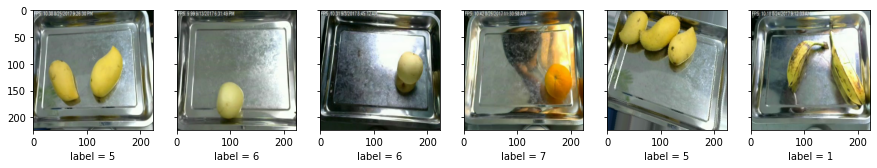

In [29]:
dataset = iter(dataset)
imshow_batch_(next(dataset),cant=6)

Función para la creación de una red neuronal estandar
empezando con una capa convolucional y agregando capas según los elementos en el parametro que es un vector. Si el elemento ingresado es 0 se entenderá que se debe hacer un maxpooling si el elemento ingresado es -1 se entenderá que se debe hacer un batchnormalization, de  otra manera se hará una convolución con tantos filtros como diga el elemento

De manera parecida se efectuará con el Dense Layer
si el elemento es 0 se efecturaá un Dropout, si es diferente se hará un Dense con tantas unidades como diga el elemento 

El último paso es un Dense con softmax y con el número de clases que tenemos.
 
---



In [30]:
def build_standard_cnn(
    num_filters_per_convolutional_layer,
    num_units_per_dense_layer,
    input_shape,
    num_classes,
    activation='relu'):
    """
    """
    model = tf.keras.Sequential()
    model.add(
        tf.keras.layers.Conv2D(
            filters=num_filters_per_convolutional_layer[0],
            kernel_size=(3, 3), activation=activation,
            padding='same', input_shape=input_shape)
        )
    
    for num_filters in num_filters_per_convolutional_layer[1:]:
        
        if num_filters==0:
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        elif num_filters==-1:
            model.add(tf.keras.layers.BatchNormalization())        
        else:
            model.add(
                tf.keras.layers.Conv2D(
                    filters=num_filters,
                    kernel_size=(3, 3), activation=activation,
                    padding='same')
            )
        
    model.add(tf.keras.layers.Flatten())
    for num_units in num_units_per_dense_layer:
        if num_units==0:
            model.add(tf.keras.layers.Dropout(0.4))
        else:
            model.add(tf.keras.layers.Dense(num_units, activation=activation))
        
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    return model

In [31]:
tf.keras.backend.clear_session()
CNN=build_standard_cnn([32,32,0,64,64,0,128,0],[1000,0,1000,0],(224,224,3),8)

RESUMEN

In [32]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

COmpilamos el modelo con el metodo de SparseCategoricalCrossentropy  que calculará la pérdida de la CrossEntropy entre las etiquetas y las predicciones. Usaremos el algoritmo Adam con parámetro 0,001 para optimizar el modelo

In [33]:
batch_size=32
epochs=5
lr=0.001

CNN.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
            optimizer=tf.optimizers.Adam(lr),
            metrics=['accuracy'])

En la anterior celda le dimos un valor por default al batch size y escogimos 5 épocas.  Ahora creamos un dataset para train y uno para validación 

In [34]:
train_dataset = make_dataset(train_sources,
    batch_size=batch_size, num_epochs=epochs,
    num_parallel_calls=5,pixels=224)

valid_dataset = make_dataset(test_sources,
    batch_size=batch_size, num_epochs=epochs,
    num_parallel_calls=5,pixels=224)


'train_dataset = make_dataset(train_sources, training=False,\n    batch_size=batch_size, num_epochs=epochs,\n    num_parallel_calls=5,pixels=224)\n\nvalid_dataset = make_dataset(test_sources, training=False,\n    batch_size=batch_size, num_epochs=epochs,\n    num_parallel_calls=5,pixels=224)'

Entrenamos el modelo con duración aproximada de 50 minutos, parametros x= dataset de entrenamiento , 5 épocas y para el argumento validation_data usamos el dataset de validación

In [35]:
h=CNN.fit(x=train_dataset, epochs=5,validation_data=valid_dataset)

Epoch 1/5
3937/3937 [==============================] - 601s 153ms/step - loss: 0.2195 - accuracy: 0.9244 - val_loss: 0.2858 - val_accuracy: 0.9307
Epoch 2/5
3937/3937 [==============================] - 567s 144ms/step - loss: 0.0384 - accuracy: 0.9898 - val_loss: 0.3683 - val_accuracy: 0.9267
Epoch 3/5
3937/3937 [==============================] - 555s 141ms/step - loss: 0.0286 - accuracy: 0.9927 - val_loss: 0.5519 - val_accuracy: 0.8957
Epoch 4/5
3937/3937 [==============================] - 556s 141ms/step - loss: 0.0259 - accuracy: 0.9941 - val_loss: 0.3247 - val_accuracy: 0.9256
Epoch 5/5
3937/3937 [==============================] - 555s 141ms/step - loss: 0.0212 - accuracy: 0.9954 - val_loss: 0.4690 - val_accuracy: 0.9219


Imprimimos la gráficas de la pérdida y el  accuracy entre el train y el test

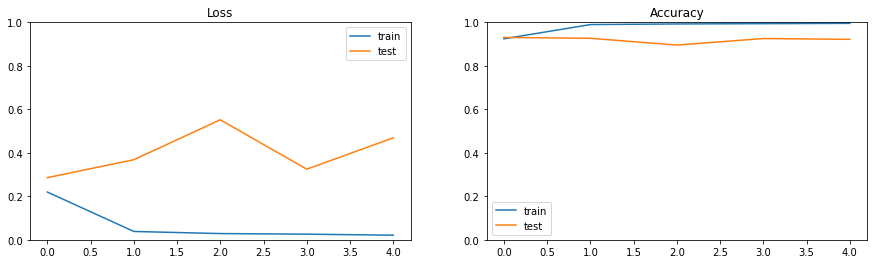

In [36]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.ylim((0, 1))
plt.plot(h.history['loss'],label='train')
plt.plot(h.history['val_loss'],label='test')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.ylim((0, 1))
plt.plot(h.history['accuracy'],label='train')
plt.plot(h.history['val_accuracy'],label='test')
plt.title('Accuracy')
plt.legend()

In [37]:
%cd /content

/content


In [38]:
CNN.save('model.h5')

In [39]:
CNN = keras.models.load_model('model.h5')

Creamos otro dataset con diferente tamaño de batch para poder crear la matriz de confusión, usamos predict_classes a este nuevo data_set.

In [40]:
test_dataset= make_dataset(test_sources,
    batch_size=1, num_epochs=1,
    num_parallel_calls=5,pixels=224)

In [43]:
predict_classes=CNN.predict_classes(test_dataset)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


cm = es la matriz de confusión no normalizada, para poder saber el número de clases bien predichas, solo se usan las etiquetas que aparecen en los datos y luego graficamos la matriz de una forma mucho más amigable 

Confusion matrix, without normalization
[[398   5   0   4  10   1  18   0]
 [  2 251   0   8   3  12   6   0]
 [  0   2 208   3   0   6   0   0]
 [  9   9   0 344  16   5  12   0]
 [  5   3   0   6 364   0  11   0]
 [  2   7   1   3   0 403   5   3]
 [ 10   5   0  15   5   1 262   0]
 [  0   0   0   0   0   1   0 297]]


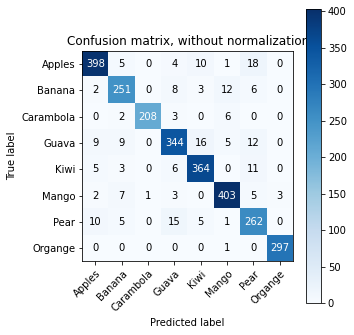

In [71]:
def plot_confusion_matrix(y_true, y_pred, classes,size,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    target_names=['Apples','Banana','Carambola','Guava','Kiwi','Mango','Pear','Organge']

    fig, ax = plt.subplots(figsize=(size,size))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=target_names, yticklabels=target_names,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
  
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
a=np.array([0,1,2,3,4,5,6,7])

plot_confusion_matrix(df[df['split']=='test'].label,predict_classes,a,size=5)

Esta función nos permite mostrar lotes de imagenes y sus predicciones,  recibe un batch que contendrá las imagenes y los labels, con las imagenes predicirá el label usando el modelo y nos mostrará la imagen, su label y su predicción

In [66]:
def imshow_with_predictions(model, batch, show_label=True):    
    image_batch = batch[0].numpy()
    label_batch = batch[1].numpy()
    pred_batch = model.predict(image_batch)
    fig, axarr = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    for i in range(3):
        img = image_batch[i, ...]
        axarr[i].imshow(img)
        pred = int(np.argmax(pred_batch[i]))
        msg = f'pred = {pred}'
        if show_label:
            msg += f', label = {label_batch[i]}'
        axarr[i].set(xlabel=msg)  

la función anterior la probaremos con el valid_dataset y con el modelo CNN que fue el entrenado

In [49]:
v=iter(valid_dataset)


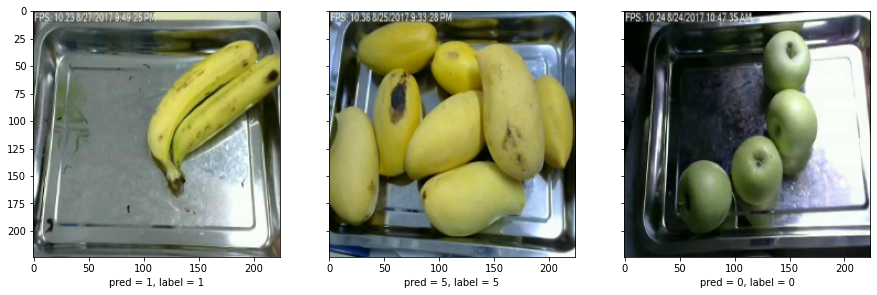

In [50]:
imshow_with_predictions(CNN, next(v))

Predicción incorrecta

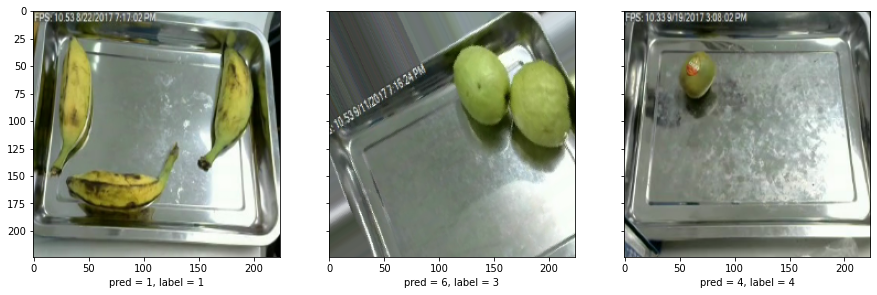

In [51]:
imshow_with_predictions(CNN, next(v))

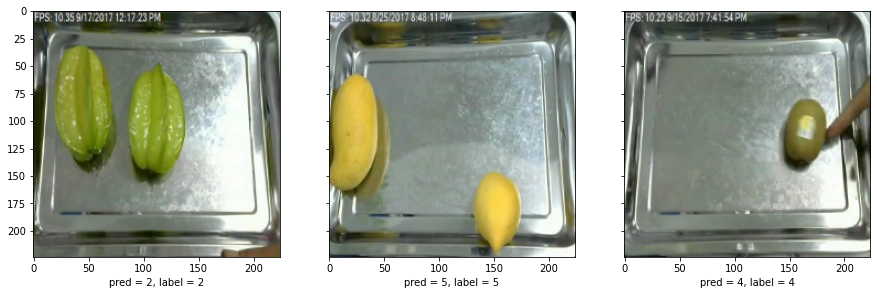

In [52]:
imshow_with_predictions(CNN, next(v))

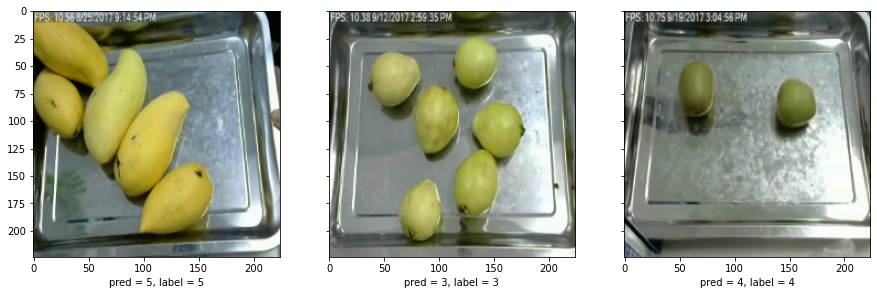

In [53]:
imshow_with_predictions(CNN, next(v))

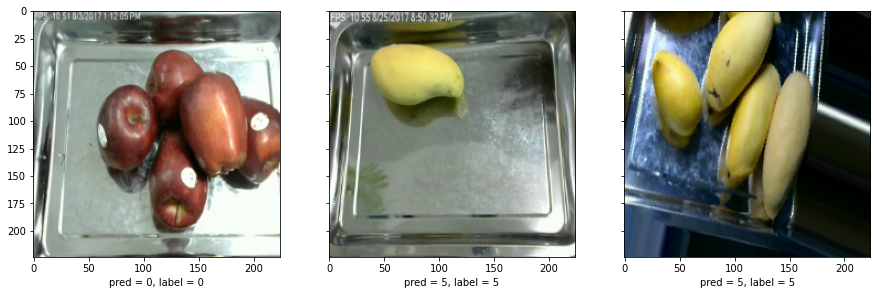

In [54]:
imshow_with_predictions(CNN, next(v))

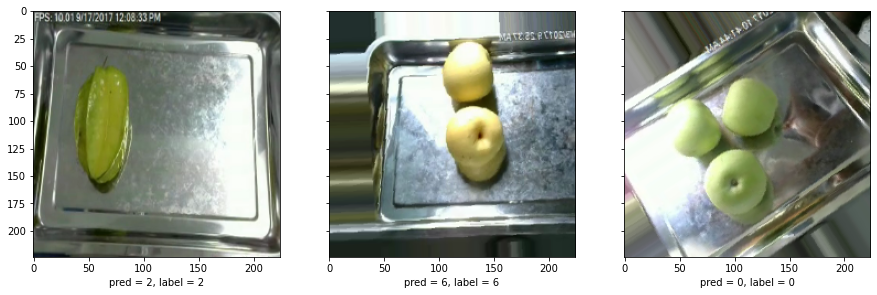

In [55]:
imshow_with_predictions(CNN, next(v))

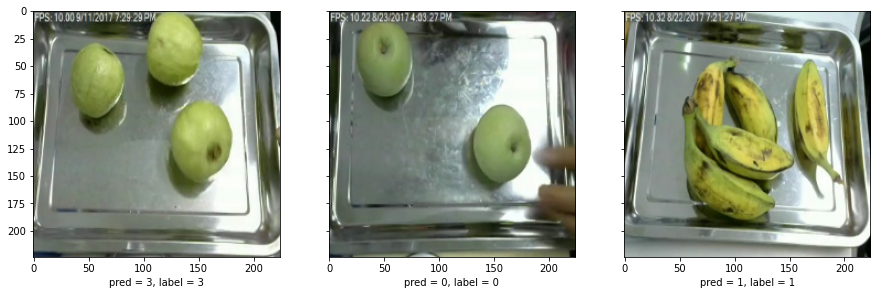

In [56]:
imshow_with_predictions(CNN, next(v))

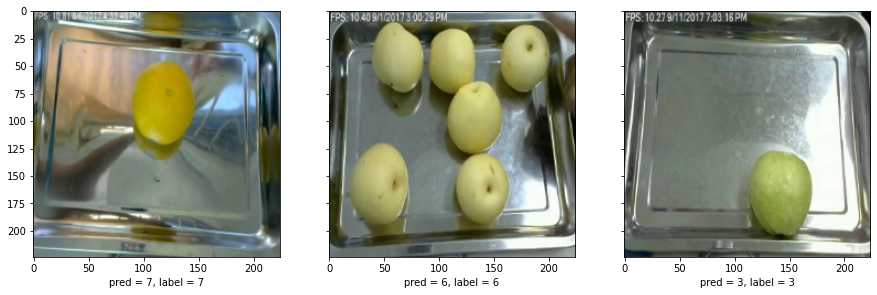

In [57]:
imshow_with_predictions(CNN, next(v))

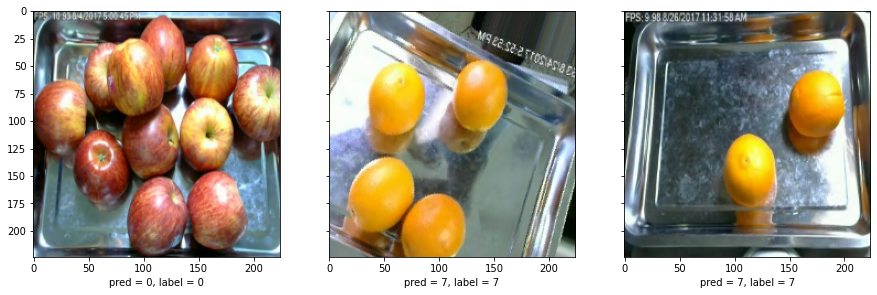

In [58]:
imshow_with_predictions(CNN, next(v))

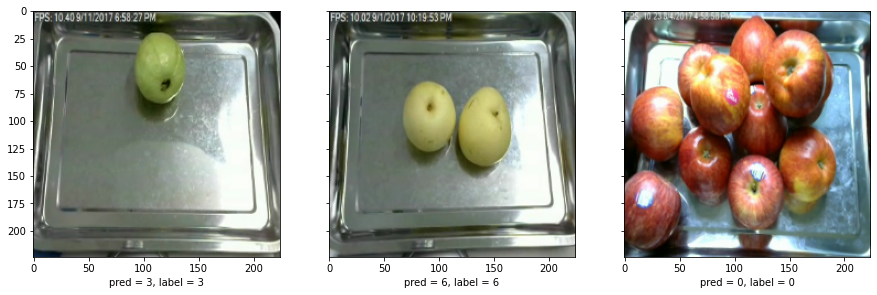

In [59]:
imshow_with_predictions(CNN, next(v))

Calculamos, precision recall y f1-score y accuracy, vemos que el modelo se comporta de  buena manera 

In [67]:
from sklearn.metrics import classification_report
target_names=['Apples','Banana','Carambola','Guava','Kiwi','Mango','Pear','Organge']
print(classification_report(df[df['split']=='test'].label,predict_classes, target_names=target_names))

              precision    recall  f1-score   support

      Apples       0.93      0.91      0.92       436
      Banana       0.89      0.89      0.89       282
   Carambola       1.00      0.95      0.97       219
       Guava       0.90      0.87      0.88       395
        Kiwi       0.91      0.94      0.93       389
       Mango       0.94      0.95      0.94       424
        Pear       0.83      0.88      0.86       298
     Organge       0.99      1.00      0.99       298

    accuracy                           0.92      2741
   macro avg       0.92      0.92      0.92      2741
weighted avg       0.92      0.92      0.92      2741



DE aquí en adelante se creará un dataframe con las frutas que no fueron usadas en el modelo para probar que predice el modelo con datos fuera de contexto, esta  parte es identica a la extracción del dataframe al principio

In [176]:

dir=[]
fruit_dir= Path('.')
carpetas2=['/content/Persimmon','/content/Peach', '/content/Pitaya', '/content/Plum', 
          '/content/Pomegranate', '/content/Tomatoes', '/content/muskmelon']
          
target_c_names=target_names+['Persimon','Peach','Pitaya','Plum','Pomegranate','Tomatoes','Muskmelon']

for i in range(len(carpetas2)):
  dir.append(fruit_dir / carpetas2[i])

datos=[]

for j in range(len(carpetas2)):
  datos.append(dir[j].glob('*.png'))

data=[]
f=8
cont=0
for k in datos:  
  for l in k:
    data.append((l,f))
   
  f+=1

df2=pd.DataFrame()
df2['names'],df2['label']=zip(*data)


df2 = df2.sample(frac=1).reset_index(drop=True)

df2.head(20)



names  label
0        /content/Tomatoes/Tamotoes00595.png     13
1     /content/muskmelon/Muskmelon 00529.png     14
2              /content/Peach/Peach00228.png      9
3        /content/Tomatoes/Tamotoes00535.png     13
4            /content/Pitaya/Pitaya00835.png     10
5   /content/Pomegranate/Pomegranet00286.png     12
6     /content/muskmelon/Muskmelon 00563.png     14
7           /content/Pitaya/Pitaya001962.png     10
8       /content/Persimmon/Persimmon1871.png      8
9     /content/muskmelon/Muskmelon 00722.png     14
10             /content/Peach/Peach00348.png      9
11      /content/Persimmon/Persimmon1065.png      8
12      /content/Persimmon/Persimmon1243.png      8
13          /content/Pitaya/Pitaya002466.png     10
14              /content/Plum/PlumуАВ498.png     11
15  /content/Pomegranate/Pomegranet00201.png     12
16             /content/Plum/PlumуАВ1778.png     11
17       /content/Tomatoes/Tamotoes00102.png     13
18       /content/Persimmon/Persimmon727.png      8
19           /content/Pitaya/Pitaya00120.png     10

In [177]:
target_c_names=target_names+['Persimon','Peach','Pitaya','Plum','Pomegranate','Tomatoes','Muskmelon']
target_c_names

['Apples',
 'Banana',
 'Carambola',
 'Guava',
 'Kiwi',
 'Mango',
 'Pear',
 'Organge',
 'Persimon',
 'Peach',
 'Pitaya',
 'Plum',
 'Pomegranate',
 'Tomatoes',
 'Muskmelon']

Se usan las funciones descritas anteriormente

In [178]:
def build_sources_from_metadata_fixed(metadata, data_dir, mode='train'):  


    df = metadata.copy()    
    df['filepath'] = df['names'].apply(lambda x: os.path.join(data_dir, x))


    sources = list(zip(df['filepath'], df['label']))
    return sources

creamos un dataset 'crazy' que solo obtendrá imágenes erróneas, para ver cómo se comporta el modelo


In [179]:
crazy_source=build_sources_from_metadata_fixed(df2,'.')

In [180]:
crazy_test=make_dataset(crazy_source,
    batch_size=batch_size, num_epochs=epochs,
    num_parallel_calls=5,pixels=224)

arreglamos un poco esta función para poder revisar correctamente los labels 

In [184]:
def imshow_with_predictions_fixed(model, batch, show_label=True,target_c_names=['Apples','Banana',
                                                                                'Carambola','Guava','Kiwi','Mango',
                                                                                'Pear','Organge','Persimon','Peach',
                                                                                'Pitaya','Plum','Pomegranate','Tomatoes'
                                                                                ,'Muskmelon']):
    label_batch = batch[1].numpy()
    
    image_batch = batch[0].numpy()
    pred_batch = model.predict(image_batch)
    fig, axarr = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    for i in range(3):
        img = image_batch[i, ...]
        axarr[i].imshow(img)
        pred = int(np.argmax(pred_batch[i]))
        msg = f'pred = {pred} '
        
        if show_label:
            msg += f', label = {label_batch[i]}'
        axarr[i].set(xlabel=msg) 

E iteramos, en lotes de a 3

In [185]:
c=iter(crazy_test)


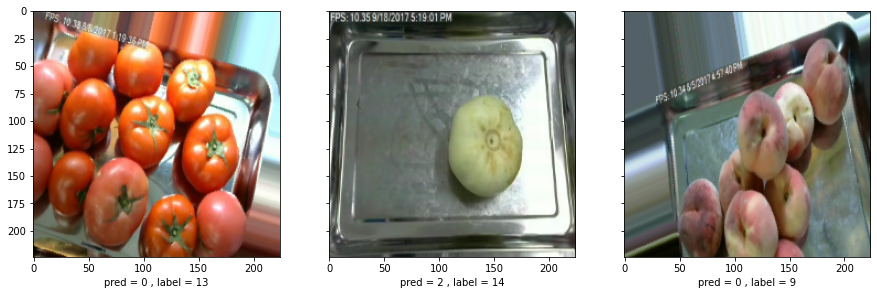

In [186]:
imshow_with_predictions_fixed(CNN, next(c))

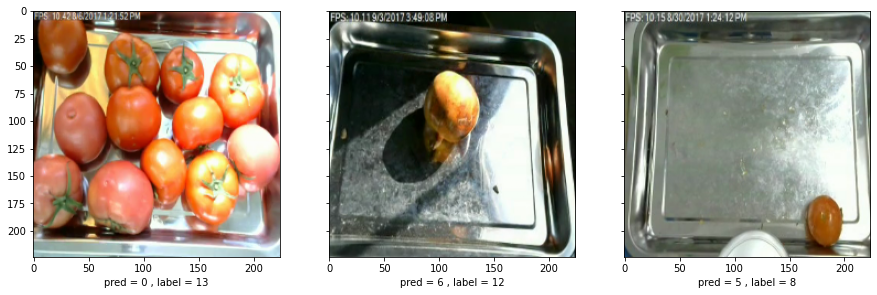

In [187]:
imshow_with_predictions_fixed(CNN, next(c))

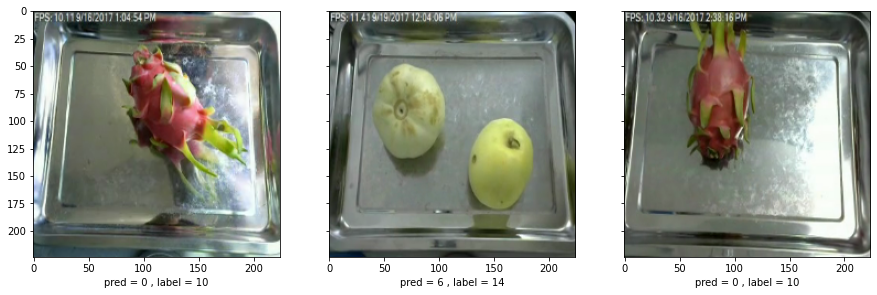

In [188]:
imshow_with_predictions_fixed(CNN, next(c))

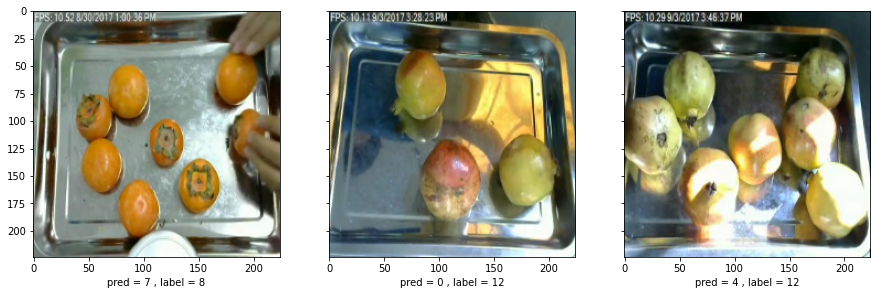

In [189]:
imshow_with_predictions_fixed(CNN, next(c))

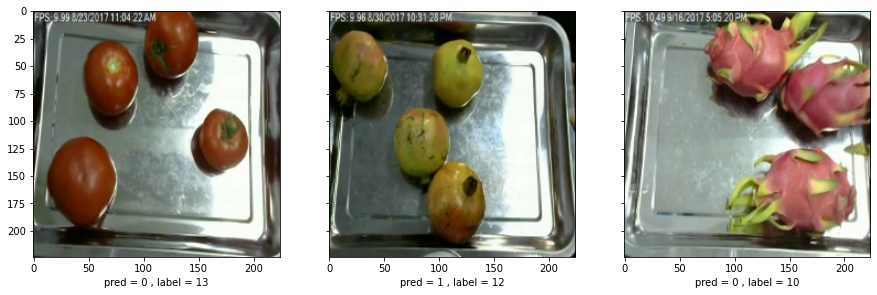

In [190]:
imshow_with_predictions_fixed(CNN, next(c))